* [Boston Housing Dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

* [Tutorial Reference](https://amitg0161.medium.com/sklearn-linear-regression-tutorial-with-boston-house-dataset-cde74afd460a)

* [Linear Regression](https://github.com/greyhatguy007/Machine-Learning-Specialization-Coursera/blob/main/C1%20-%20Supervised%20Machine%20Learning:%20Regression%20and%20Classification/week2/Optional%20Labs/C1_W2_Lab06_Sklearn_Normal_Soln.ipynb)

In [ ]:
# Importing Data
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
# Tables Library
import pandas as pd
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names

# Add Price Column
df['Price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


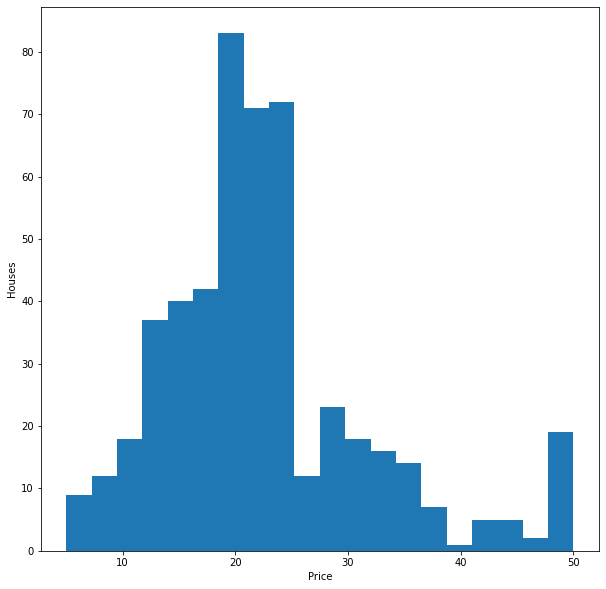

In [4]:
# Plotting Library
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

plt.xlabel("Price")
plt.ylabel("Houses")

plt.hist(df['Price'], bins=20)
plt.show()

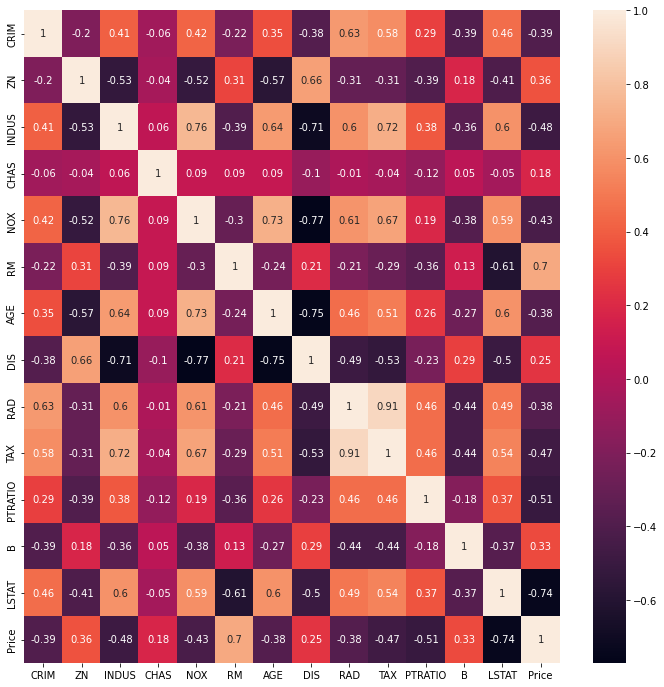

In [5]:
corr = df.corr().round(2)
import seaborn as sb
plt.subplots(figsize=(12,12))
sb.heatmap(corr, annot=True)

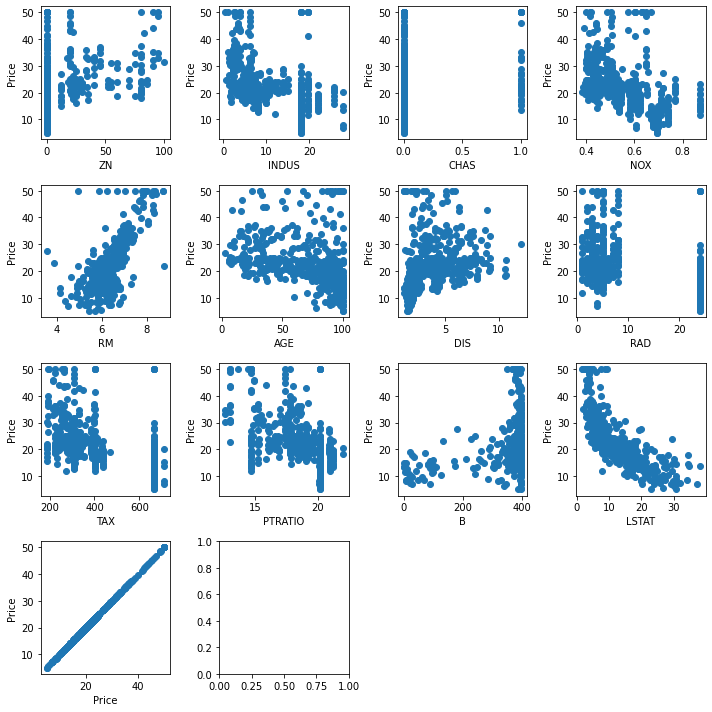

In [6]:
plt.figure(figsize=(10,10))
x=1
for i in df.columns:  # Plotting each features with respect to Price
    plt.scatter(df[i],df['Price'])
    plt.xlabel(i)
    plt.ylabel("Price")
    plt.subplot(4,4,x)
    x+=1
plt.tight_layout()

Text(0.5, 0, 'Rooms')

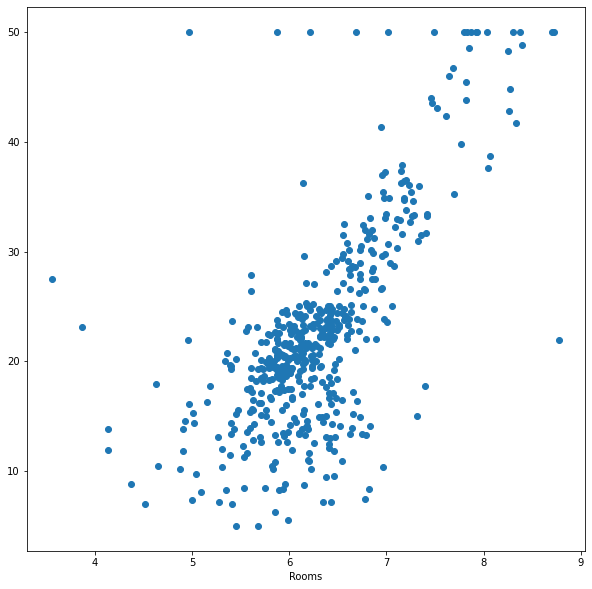

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(df['RM'],df['Price'])
plt.xlabel('Rooms')

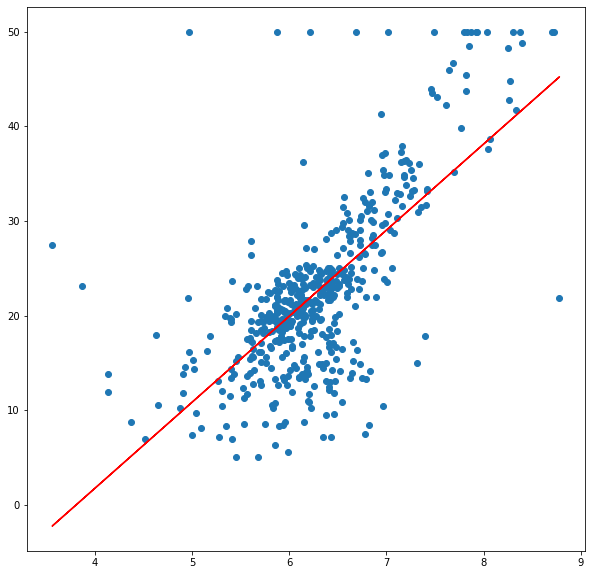

In [8]:
plt.figure(figsize=(10,10))
plt.scatter(df['RM'],df['Price'])

from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

rooms = df[['RM']].to_numpy()
price = df['Price'].to_numpy()
linear_model.fit(rooms,price)
w = linear_model.coef_
b = linear_model.intercept_

#add line of best fit to plot
plt.plot(df['RM'], w * df['RM'] + b, '-r')

In [9]:
# Make a prediction
rooms = 6
price = linear_model.predict([[rooms]])[0]
price

19.942033110643294